## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

## Exploring and preparing the datasets about misogyny/gender 

### Jigsaw

Exploring the posts' annotations wrt specific sensitive social categories (the post is identified through 'id'; in this file there isn't the post's text)

In [2]:
jigsaw_annotation = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Jigsaw/identity_individual_annotations.csv', index_col=None, header=0)
jigsaw_annotation

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
0,59856,211,none,none,none,none,none
1,59856,683,intellectual_or_learning none,none,none,none,none
2,59856,8899,none,none,none,none,none
3,59856,67,none,none,none,none,none
4,239579,8900,none,none,none,none,none
...,...,...,...,...,...,...,...
2597360,6333923,2477,none,none,none,atheist,none
2597361,6333923,3488,none,none,none,none,none
2597362,6333923,805,none,none,none,atheist,none
2597363,6333923,2493,none,none,other,atheist,none


Visualizing separatly
* disability
* gender & sexual_orientation
* race_or_ethnicity	
* religion	

In [3]:
disability=jigsaw_annotation[(jigsaw_annotation.disability!='none')]
disability

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
1,59856,683,intellectual_or_learning none,none,none,none,none
176,240813,8908,psychiatric_or_mental_illness,none,none,none,none
177,240813,967,psychiatric_or_mental_illness,none,none,none,none
178,240813,1709,psychiatric_or_mental_illness,none,none,none,none
179,240813,8910,psychiatric_or_mental_illness,none,none,none,none
...,...,...,...,...,...,...,...
2596728,6329399,454,psychiatric_or_mental_illness,none,none,none,none
2596730,6329399,541,psychiatric_or_mental_illness,none,none,none,none
2596875,6330362,3613,other,none,none,none,none
2597084,6331431,2135,other,male,none,christian,homosexual_gay_or_lesbian


In [4]:
ratial=jigsaw_annotation[(jigsaw_annotation.race_or_ethnicity!='none')]
ratial

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
43,239852,422,none,none,asian,none,none
62,239980,8903,none,female,other,none,none
112,240528,1183,none,none,asian,none,none
113,240528,1950,none,none,asian,none,none
116,240528,1601,none,none,asian,none,none
...,...,...,...,...,...,...,...
2597326,6333563,303,none,none,other,none,none
2597331,6333584,9361,none,none,asian,none,none
2597332,6333584,5488,none,none,asian,none,none
2597333,6333584,501,none,none,asian,none,none


In [5]:
religious=jigsaw_annotation[(jigsaw_annotation.religion!='none')]
religious

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
48,239853,1545,none,none,none,christian,none
51,239853,1688,none,none,none,christian,none
54,239853,715,none,none,none,other,none
58,239893,1168,none,none,none,christian,none
59,239893,8908,none,none,none,christian,none
...,...,...,...,...,...,...,...
2597359,6333923,4721,none,none,none,atheist,none
2597360,6333923,2477,none,none,none,atheist,none
2597362,6333923,805,none,none,none,atheist,none
2597363,6333923,2493,none,none,other,atheist,none


Exploring unique values in each column, in order to explore the items/types present in the macro-categories

In [6]:
jigsaw_annotation.disability.value_counts()

none                                                                     2533981
psychiatric_or_mental_illness                                              46462
intellectual_or_learning                                                    5092
physical                                                                    4659
other                                                                       3965
physical intellectual_or_learning psychiatric_or_mental_illness              764
physical psychiatric_or_mental_illness                                       748
physical intellectual_or_learning                                            465
intellectual_or_learning psychiatric_or_mental_illness                       317
other none                                                                   188
psychiatric_or_mental_illness none                                           138
psychiatric_or_mental_illness other                                          137
physical none               

In [7]:
jigsaw_annotation.gender.value_counts()

none                             1973921
female                            233569
male                              209166
male female                       137517
transgender                        30474
other                               2596
female transgender                  2503
male transgender                    2498
male female transgender             2280
male none                           1169
female none                          646
male female none                     221
transgender none                     218
other none                           190
male female other                     98
transgender other                     93
male other                            75
female other                          66
male female transgender other         22
female transgender none               11
female transgender other               9
male other none                        7
transgender other none                 4
male transgender other                 4
female other non

In [8]:
jigsaw_annotation.sexual_orientation.value_counts()

none                                                          2469388
homosexual_gay_or_lesbian                                       96340
heterosexual                                                     8792
homosexual_gay_or_lesbian bisexual                               6650
heterosexual homosexual_gay_or_lesbian                           6008
other                                                            4609
bisexual                                                         2865
homosexual_gay_or_lesbian bisexual other                          654
homosexual_gay_or_lesbian other                                   486
heterosexual homosexual_gay_or_lesbian bisexual                   469
homosexual_gay_or_lesbian none                                    301
heterosexual homosexual_gay_or_lesbian other                      148
other none                                                        145
heterosexual none                                                 136
heterosexual homosex

In [9]:
jigsaw_annotation.race_or_ethnicity.value_counts()

none                              2217610
white                              139319
black                               75821
asian                               43252
black white                         38059
latino                              29551
other                               21579
black asian                          5374
black white asian                    3853
black white latino                   3685
black latino                         3145
white other                          2345
white latino                         1909
white asian                          1851
black white asian latino             1671
asian other                          1287
black other                          1139
latino none                           955
black white other                     721
latino other                          720
black none                            656
white none                            511
asian latino                          485
black asian latino                

Moving to the training file

In [2]:
jigsaw_train_all = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Jigsaw/train.csv', index_col=None, header=0)
jigsaw_train_all

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


Keeping only the posts whose score is > 0 for: 
* physical_disability intellectual_or_learning_disability psychiatric_or_mental_illness other_disability

and removing duplicate posts (if a post has a score > 0 in more than one of these selected columns)

In [3]:
dis_list = ['intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 
            'other_disability']

jigsaw_dis=jigsaw_train_all[(jigsaw_train_all.physical_disability>0)] 

for item in dis_list:
    jigsaw_dis=jigsaw_dis.append(jigsaw_train_all[(jigsaw_train_all[item]>0)])

jigsaw_dis=jigsaw_dis.drop_duplicates(subset=['id'])

In [4]:
jigsaw_dis[['id','target','comment_text']]

,id,target,comment_text
721,240969,0.000000,"Replying to myself here, because I just looked..."
1449,242369,0.000000,Assuming this was a blind tasting?
2256,243814,0.000000,"boy, enough can't be said for safety equipment..."
3272,245145,0.200000,I believe that any serious student of history...
3378,245320,0.000000,Thank you for this post. Often folks look for...
...,...,...,...
1802972,6331315,0.000000,"Do you really believe that ""whatever you bind ..."
1803073,6331431,0.300000,"Yes, most families. Just for ducks, here's min..."
1803291,6331698,0.400000,If Francis is concerned about the health of Va...
1804369,6333153,0.166667,Clearly your daughter needs a lot of help at s...


Keeping only columns that matters to us

In [5]:
jigsaw_dis = jigsaw_dis.rename(columns={'comment_text': 'text','target': 'dis'})
jigsaw_dis

,id,dis,text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
721,240969,0.000000,"Replying to myself here, because I just looked...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,34573,approved,0,0,0,0,0,0.0,10,4
1449,242369,0.000000,Assuming this was a blind tasting?,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,35881,approved,0,0,0,0,0,0.0,6,4
2256,243814,0.000000,"boy, enough can't be said for safety equipment...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,38398,approved,0,0,0,1,0,0.0,10,4
3272,245145,0.200000,I believe that any serious student of history...,0.0,0.0,0.2,0.200000,0.0,0.0,0.0,...,40324,approved,0,0,0,0,0,0.0,10,5
3378,245320,0.000000,Thank you for this post. Often folks look for...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,40401,approved,0,0,0,1,0,0.0,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802972,6331315,0.000000,"Do you really believe that ""whatever you bind ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,398489,approved,0,0,0,0,0,0.0,10,4
1803073,6331431,0.300000,"Yes, most families. Just for ducks, here's min...",0.0,0.0,0.2,0.100000,0.0,0.0,0.0,...,398961,approved,0,0,0,0,0,0.1,6,10
1803291,6331698,0.400000,If Francis is concerned about the health of Va...,0.0,0.0,0.1,0.100000,0.0,0.0,0.0,...,398860,approved,0,0,0,0,0,0.3,6,10
1804369,6333153,0.166667,Clearly your daughter needs a lot of help at s...,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,...,399301,approved,0,0,0,0,0,0.0,10,6


In [6]:
r4 = jigsaw_dis[['text','dis']]

In [7]:
r4

,text,dis
721,"Replying to myself here, because I just looked...",0.000000
1449,Assuming this was a blind tasting?,0.000000
2256,"boy, enough can't be said for safety equipment...",0.000000
3272,I believe that any serious student of history...,0.200000
3378,Thank you for this post. Often folks look for...,0.000000
...,...,...
1802972,"Do you really believe that ""whatever you bind ...",0.000000
1803073,"Yes, most families. Just for ducks, here's min...",0.300000
1803291,If Francis is concerned about the health of Va...,0.400000
1804369,Clearly your daughter needs a lot of help at s...,0.166667


Mapping the score to 0 or 1 (binary encoding). The official competition considered each post with target >= 0.5 to be toxic (https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data?select=train.csv) but we noticed that we need a precise set, so we raised the score to 0.6.

In [8]:
r4['dis'] = np.where((r4['dis'] >= 0.6), 1, r4['dis'])
r4['dis'] = np.where((r4['dis'] < 0.6), 0, r4['dis'])
r4

/Users/Marta/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Marta/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,dis
721,"Replying to myself here, because I just looked...",0.0
1449,Assuming this was a blind tasting?,0.0
2256,"boy, enough can't be said for safety equipment...",0.0
3272,I believe that any serious student of history...,0.0
3378,Thank you for this post. Often folks look for...,0.0
...,...,...
1802972,"Do you really believe that ""whatever you bind ...",0.0
1803073,"Yes, most families. Just for ducks, here's min...",0.0
1803291,If Francis is concerned about the health of Va...,0.0
1804369,Clearly your daughter needs a lot of help at s...,0.0


For now, because these texts are from a different genres than the others (social media posts, mainly from Twitter) we don't use them when building the test's suite for Automatic Misogyny Detection. The texts from Jigsaw are long, often well structured, no emojis or unusual punctuation or slang spelling grammar. 

In [9]:
r4.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Dis_Jigsaw.csv')

### SBF

In [10]:
s0=[]
s1 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.dev.csv', index_col=None, header=0)
s2 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.trn.csv', index_col=None, header=0)
s3 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.tst.csv', index_col=None, header=0) 
s0.append(s1)
s0.append(s2)
s0.append(s3)
s = pd.concat(s0, axis=0, ignore_index=True)

In [11]:
s

,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,post,targetMinority,targetCategory,targetStereotype
0,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,2428559182657536645,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,29.0,Every half-breed cop in America is trying to r...,police officers,social,rape women
1,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,2428559182657536645,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,29.0,Every half-breed cop in America is trying to r...,police officers,social,NaN
2,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,mixed folks,race,mixed folks are rapists.
3,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,mixed folks,race,mixed folks like white women.
4,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,cops,social,cops can't be trusted.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147134,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,mod-liberal,white,40.0,Minimum attractiveness to get women per height...,women,gender,women are shallow
147135,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,mod-liberal,white,40.0,Minimum attractiveness to get women per height...,women,gender,women care about a man's height
147136,0.0,1.00,0.0,NaN,1.0,man,NaN,NaN,NaN,7891575995618716029,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,mod-liberal,white,40.0,"Always remember, it was normies that enacted t...",NaN,NaN,NaN
147137,0.0,0.66,0.0,NaN,0.5,man,NaN,NaN,NaN,-7790343187498138255,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,cons,white,49.0,"Always remember, it was normies that enacted t...",NaN,NaN,NaN


In [12]:
s['targetCategory'].value_counts()

race        22453
gender      14655
culture     12617
victim       3265
disabled     3156
social       2324
body         1390
Name: targetCategory, dtype: int64

In [13]:
s['offensiveYN'].value_counts()

1.0    74211
0.0    57909
0.5    12529
Name: offensiveYN, dtype: int64

In [14]:
r5=s[s.targetCategory=='disabled']

r5=r5.drop_duplicates(subset=['post'])
r5

,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,post,targetMinority,targetCategory,targetStereotype
185,1.0,0.33,0.0,NaN,1.0,woman,"disabled, bisexual",NaN,0.0,5225876289250202382,36AZSFEYZ4U7QJE4B992TPBPSRWBVY,liberal,white,32.0,"Twitter game is on point tonight btw guys, if ...",mentally disabled folks,disabled,disabled people are fun to laugh at.
683,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,-7598494085232335834,32CAVSKPCEJ6067C4M68RRWXS9FU1U,liberal,white,41.0,Having a 'new boyfriend' every month doesn't m...,mentally disabled folks,disabled,mentally disabled are referred to as retarded.
934,1.0,0.66,0.0,NaN,1.0,woman,none,NaN,0.0,-3114316428557054065,33IXYHIZB5CW0VSMXQRHSSKZYQFE2S,mod-cons,white,33.0,why is my mom so fucking bipolar swear she's t...,folks with mental illness/disorder,disabled,people with mental illness are annoying
1827,1.0,0.33,0.0,NaN,1.0,woman,NaN,NaN,0.5,6850748243603538565,3QO7EE372OHFLBINPAFSN2CHC0JBQ9,liberal,white,39.0,"""RT @GErvoBaby: """" Me-Tard, You-tard, Retard N...",mentally disabled folks,disabled,mentally challenged people are retarded
3778,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.5,1781840716988750702,3UQ1LLR26A2ZB4XIRR70B5THIV3ALG,liberal,white,29.0,"""""""Shaply"""" - @King_Rockhammer 2017. When you ...","folks with mental illness/disorder, mentally d...",disabled,mentally disabled folks are retards.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145019,1.0,0.66,0.0,NaN,0.5,man,NaN,NaN,0.0,6347880360297734464,3EHIMLB7F7TJ6KLD388ONMUFE2HH8Q,mod-liberal,white,35.0,I'd say a fitting punishment is dealing with t...,mentally disabled folks,disabled,they are not smart
145769,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-5313160613530610330,3QO7EE372OHFLBINPAFSN2CHDWKBQ3,liberal,white,25.0,"He's a retarded feral negro ( yes , feral huma...",mentally disabled folks,disabled,mentally disabled folks are incompetent
145859,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,1.0,1843185595144375092,3QMELQS6Y559R0GS6YNKHC0UVI46R9,liberal,white,29.0,"If you look like me, you should just give up a...",folks with mental illness/disorder,disabled,makes light of suicide
146125,1.0,1.00,0.0,NaN,1.0,woman,female,NaN,0.0,5330619308534303933,3BS6ERDL931FQQXNOXS0CNJQGHDD6A,mod-cons,white,35.0,Got banned from r/Aspergers for throwing red p...,folks with mental illness/disorder,disabled,they need to be on pills all the time


We map the score into 0 or 1

In [15]:
r5['offensiveYN'] = np.where((r5['offensiveYN'] >= 0.5), 1, r5['offensiveYN'])
r5['offensiveYN'] = np.where((r5['offensiveYN'] < 0.5), 0, r5['offensiveYN'])
r5=r5[['post', 'offensiveYN']]

In [16]:
r5 = r5.rename(columns={'post': 'text','offensiveYN': 'dis'})
r5

,text,dis
185,"Twitter game is on point tonight btw guys, if ...",1.0
683,Having a 'new boyfriend' every month doesn't m...,1.0
934,why is my mom so fucking bipolar swear she's t...,1.0
1827,"""RT @GErvoBaby: """" Me-Tard, You-tard, Retard N...",1.0
3778,"""""""Shaply"""" - @King_Rockhammer 2017. When you ...",1.0
...,...,...
145019,I'd say a fitting punishment is dealing with t...,1.0
145769,"He's a retarded feral negro ( yes , feral huma...",1.0
145859,"If you look like me, you should just give up a...",1.0
146125,Got banned from r/Aspergers for throwing red p...,1.0


In [17]:
r5.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Dis_SBF.csv')

### Founta

In [18]:
tr = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Founta/train.tsv', sep='\t', index_col=None, header=0)
ts = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Founta/test.tsv', sep='\t', index_col=None, header=0)
dev = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Founta/dev.tsv', sep='\t', index_col=None, header=0)

In [19]:
tr=tr.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
tr = tr.rename(columns={'#1 String': 'text','index': 'dis'})
tr.head()

,dis,text
0,0,isn't this the smirk of a douche who was born ...
1,1,"for the record, i'm a fucking ray of sunshine."
2,0,that's one issue. a strong affordable housing ...
3,1,the lazers from this set had me sooo fucked up...
4,1,how many times are they gonna let him fuck the...


In [20]:
ts=ts.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
ts = ts.rename(columns={'#1 String': 'text','index': 'dis'})
ts.head()

,dis,text
0,0,"she was like ""you know we can't have pets"" i j..."
1,0,big pharma and animal ag. industries. they wan...
2,1,girl don't play with my emotions like that. if...
3,0,mariska hargitay and ice-t filming a muslin an...
4,0,could it be that you're not looking at the sam...


In [21]:
dev=dev.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
dev = dev.rename(columns={'#1 String': 'text','index': 'dis'})
dev.head()

,dis,text
0,0,"@maggienyt sorry kids, elmo & big bird have to..."
1,0,yall pls help me find those tix pls help rt🙇🙇 ...
2,0,as checked your recharge transaction is succes...
3,1,bc im not yet done fucking up your life bby
4,0,the best creation ever was half-and-half pizza...


In [22]:
texts=[]
labels=[]
key_words=['disability', 'disabilities', 'mental illness', 'mentally sick',
           'psychiatric', 'mental', 'physical disability', 'physical disabilities',
           'intellectual disability', 'intellectual disabilities'] 
 
for i in range (len(tr)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['dis'][i])

for i in range (len(ts)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['dis'][i])
        
for i in range (len(dev)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['dis'][i])
            
r7=pd.DataFrame({'text': texts, 'dis': labels})
r7=r7.drop_duplicates(subset=['text'])

In [23]:
r7

,text,dis
0,great as usual! @henrylovesyou 's commentary o...,0
1,when is reneigh coming back from newzealand so...,0
2,"#readabookor2 maybe the idea has always been, ...",0
3,"try us, if you want a weekly show featuring 2 ...",0
4,"it is the most stupidest thing ever, and why f...",1
5,so we would expect them to engage in a cultura...,0
6,went to see #missnightingale at the vaults. fi...,0
7,i think that is very true. i've never been as ...,0
8,"more #ifyouaretheone words of wisdom? 😱😵😂 ""pro...",0
9,idiot of the moment.💡 dianne feinstein for thi...,1


In [24]:
r7.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Dis_Founta.csv')

## Resulting dataset

Concatenating all in a unique dataframe

In [30]:
li = []

li.append(r4) #Jigsaw
li.append(r5) #SBF
li.append(r7) #Founta

In [31]:
df = pd.concat(li, axis=0, ignore_index=True)
df

,text,dis
0,"Replying to myself here, because I just looked...",0.0
1,Assuming this was a blind tasting?,0.0
2,"boy, enough can't be said for safety equipment...",0.0
3,I believe that any serious student of history...,0.0
4,Thank you for this post. Often folks look for...,0.0
...,...,...
17882,"mr godwin, our tradition hr has relegated woma...",0.0
17883,"if you want to attack people, attack fundament...",0.0
17884,one time i had this very short instrumental mu...,0.0
17885,@popsockets these things are awesome. definite...,0.0


## General Semantics

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17887 entries, 0 to 17886
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    17887 non-null  object 
 1   dis     17887 non-null  float64
dtypes: float64(1), object(1)
memory usage: 279.6+ KB


In [33]:
df.isnull().any()

text    False
dis     False
dtype: bool

In [34]:
df.isnull().sum()

text    0
dis     0
dtype: int64

In [35]:
print ('Numero di righe, numero di colonne: ', df.shape)

Numero di righe, numero di colonne:  (17887, 2)


## Exporting to a file

Exporting it in a csv file

In [36]:
df.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/dataset_Disability.csv')

## Qualitative Data Exploration: Linguistic Analysis

Selecting the tweets' text

In [37]:
df['text']

0        Replying to myself here, because I just looked...
1                       Assuming this was a blind tasting?
2        boy, enough can't be said for safety equipment...
3        I believe  that any serious student of history...
4        Thank you for this post.  Often folks look for...
                               ...                        
17882    mr godwin, our tradition hr has relegated woma...
17883    if you want to attack people, attack fundament...
17884    one time i had this very short instrumental mu...
17885    @popsockets these things are awesome. definite...
17886    take your time it's a difficult question seein...
Name: text, Length: 17887, dtype: object

Tokenize with NLTK Tweet Tokenizer, specific for this genre 

In [38]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

tweetTok = TweetTokenizer()
tweets = df['text'].apply((lambda x: tweetTok.tokenize(x)))
tweetsString = []
for tw in tweets:
  tweetsString += tw
  tweetsString += ", "

In [39]:
from nltk.probability import FreqDist

fdist = FreqDist(tweetsString)
print(fdist)

<FreqDist with 53590 samples and 1556624 outcomes>


Computing the most frequent tokens: mainly stop-words

In [40]:
fdist.most_common(20) # da eliminare le stop words

[(',', 72601),
 ('.', 71957),
 ('the', 54462),
 ('to', 37359),
 ('and', 33008),
 ('of', 30369),
 ('a', 29958),
 ('is', 21837),
 ('in', 18154),
 ('that', 18004),
 (' ', 17887),
 ('"', 17496),
 ('I', 13234),
 ('for', 12793),
 ('are', 11924),
 ('you', 11167),
 ('?', 10034),
 ('with', 9909),
 ('not', 9713),
 ('it', 9353)]

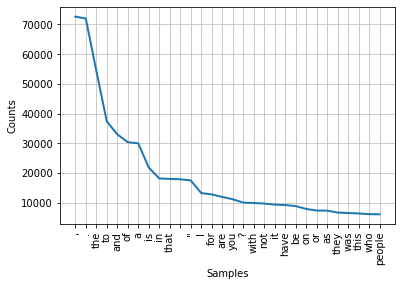

In [41]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [42]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"', '“', '”', '*', '&', 'I']
for x in punkt:
  stopWords.add(x)
print(stopWords)

{'ma', 'both', 'yourselves', 'her', 'itself', '&', '"', 'here', 'while', 'ourselves', 'myself', 'such', "it's", 'when', 'before', 'where', 'o', 'off', "you'd", 'we', 'isn', "didn't", 'of', 'then', 'as', 'is', 'in', 'whom', 't', 'hadn', 'them', 'has', 'those', 'up', '...', 'about', 'no', 'between', 'should', 'own', 'if', "wouldn't", 'having', 'she', 'shouldn', "isn't", '.', 'yours', "hadn't", 'other', 'further', 'be', "aren't", 'haven', 'yourself', '?', 'only', '“', 'with', 'doesn', 'all', "wasn't", 'our', "that'll", 'himself', 'an', "mightn't", 'this', "weren't", 'aren', "'", 'from', 'will', 'into', 'll', 'being', 'some', 'couldn', "don't", 'few', "haven't", 'his', 'out', '*', 'mustn', 'hers', 'through', 'ain', "needn't", 'what', 'am', 'same', 'during', 'its', "shan't", 'herself', "mustn't", '’', 'because', 'by', 'for', 'on', 'just', 'below', "couldn't", 'mightn', 'they', 'me', ',', 'does', 'doing', 'that', "should've", 'wouldn', 'after', 'weren', 'I', 'were', 'each', 'again', 'but', '

[nltk_data] Downloading package stopwords to /Users/Marta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtering the tweets removing the stop words from the list above

In [43]:
filtered_sent=[]
for w in tweetsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",tweetsString)
print("Filtered Sentence:",filtered_sent)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 53404 samples and 778368 outcomes>


In [45]:
fdistNoStop.most_common(30)

[(' ', 17887),
 ('people', 6101),
 ('The', 5832),
 ('mental', 5331),
 (')', 4277),
 ('(', 4102),
 ('would', 3716),
 ('like', 3311),
 ('one', 3164),
 ('health', 2747),
 ('get', 2577),
 ('mentally', 2564),
 ('Trump', 2408),
 ('It', 2352),
 ('many', 2184),
 ('You', 2107),
 ('think', 2038),
 ('ill', 2034),
 ('illness', 1992),
 ('If', 1957),
 ('This', 1956),
 ('know', 1948),
 ('need', 1841),
 ('And', 1807),
 ('time', 1757),
 ('even', 1697),
 ('women', 1687),
 ('/', 1686),
 ('He', 1600),
 ('see', 1543)]

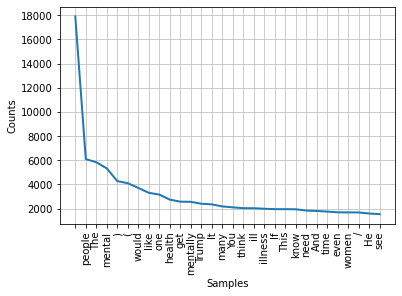

In [46]:
import matplotlib.pyplot as plt
fdistNoStop.plot(30,cumulative=False)
plt.show()

Log of frequencies

In [47]:
fdist.most_common()

[(',', 72601),
 ('.', 71957),
 ('the', 54462),
 ('to', 37359),
 ('and', 33008),
 ('of', 30369),
 ('a', 29958),
 ('is', 21837),
 ('in', 18154),
 ('that', 18004),
 (' ', 17887),
 ('"', 17496),
 ('I', 13234),
 ('for', 12793),
 ('are', 11924),
 ('you', 11167),
 ('?', 10034),
 ('with', 9909),
 ('not', 9713),
 ('it', 9353),
 ('have', 9214),
 ('be', 8864),
 ('on', 7892),
 ('or', 7365),
 ('as', 7330),
 ('they', 6682),
 ('was', 6524),
 ('this', 6389),
 ('who', 6146),
 ('people', 6101),
 ('The', 5832),
 ('mental', 5331),
 ('their', 5175),
 ('he', 4910),
 ('all', 4815),
 ('from', 4682),
 ('but', 4628),
 ('by', 4619),
 ('-', 4611),
 ('his', 4417),
 ('about', 4315),
 (')', 4277),
 ('do', 4215),
 ('at', 4160),
 ('(', 4102),
 ('has', 4100),
 ('...', 4046),
 ('your', 4045),
 ('we', 3984),
 ('an', 3982),
 ('will', 3877),
 ('!', 3845),
 ('would', 3716),
 ('what', 3613),
 ("'", 3585),
 ('can', 3541),
 ('no', 3459),
 ('like', 3311),
 ('them', 3268),
 ('so', 3247),
 ('more', 3243),
 ('one', 3164),
 ('if', 

In [48]:
fdist.N()

1556624

In [49]:
conteggio = []
for key, value in fdist.most_common():
  conteggio.append(value) # append frequenza
freqOfFreq=FreqDist(conteggio) 
freqOfFreq #frequenza - numero di valori che compaiono frequenza volte 

FreqDist({1: 25804, 2: 7133, 3: 3737, 4: 2432, 5: 1698, 6: 1279, 7: 1045, 8: 867, 9: 695, 10: 556, ...})

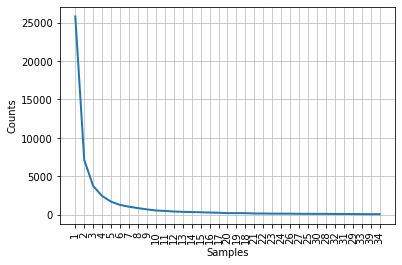

In [50]:
freqOfFreq.plot(35,cumulative=False)
plt.show()  

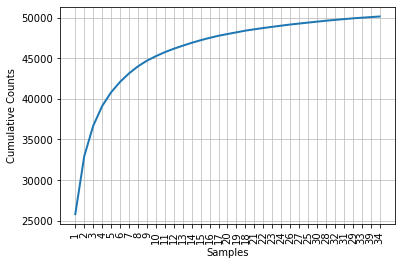

In [51]:
freqOfFreq.plot(35,cumulative=True)
plt.show()  

In [52]:
result = freqOfFreq.keys() 
data = list(result) # Convert object to a list 
numpyArrayKeys = np.array(data) # Convert list to an array 
print(numpyArrayKeys)

[72601 71957 54462 37359 33008 30369 29958 21837 18154 18004 17887 17496
 13234 12793 11924 11167 10034  9909  9713  9353  9214  8864  7892  7365
  7330  6682  6524  6389  6146  6101  5832  5331  5175  4910  4815  4682
  4628  4619  4611  4417  4315  4277  4215  4160  4102  4100  4046  4045
  3984  3982  3877  3845  3716  3613  3585  3541  3459  3311  3268  3247
  3243  3164  3132  3060  3006  2853  2747  2743  2680  2624  2594  2577
  2564  2434  2408  2407  2392  2352  2338  2318  2305  2264  2251  2238
  2234  2233  2184  2142  2107  2038  2034  2007  2003  1992  1980  1962
  1957  1956  1948  1917  1843  1841  1820  1807  1763  1757  1697  1687
  1686  1630  1600  1578  1554  1543  1539  1538  1522  1501  1489  1462
  1455  1427  1410  1400  1395  1393  1384  1378  1373  1372  1368  1366
  1361  1353  1337  1324  1320  1268  1263  1262  1254  1238  1235  1214
  1196  1187  1177  1170  1153  1148  1128  1126  1122  1119  1110  1100
  1097  1094  1079  1073  1052  1028  1026  1011  1

In [53]:
result = freqOfFreq.values() 
data1 = list(result) # Convert object to a list 
numpyArrayValues = np.array(data1) # Convert list to an array 
print(numpyArrayValues)

[    1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     2     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     2     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     2     1     1     1     1     1
     1     1     2     1     1     2     1     1   

The x variable represents the number of times a certain word appears in the text, and the y variable indicates the number of words that appear x times.



```
frequency - number of values appearing frequency times 
```

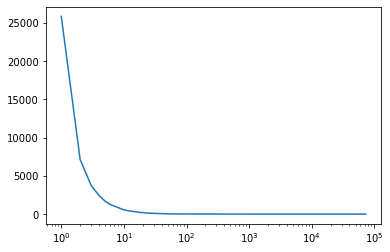

In [54]:
plt.plot(numpyArrayKeys,numpyArrayValues)
plt.xscale('log')
plt.show()

Hashtags

In [55]:
count = 0
hashtags = []
for x in tweets:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

180
['#whydontwedosomethingthatmatters', 'http://www.alz.org/care/alzheimers-dementia-aggression-anger.asp#ixzz4b00zwma1', '#', '#', '#', '#', '#', '#', 'https://en.wikipedia.org/wiki/list_of_catholic_creationist_organisations#the_kolbe_center_for_the_study_of_creation', 'http://www.medicalmarijuanainc.com/education/#cannabis-research', '#200', '#menaretrash', '#menaretrash', '#', '#', '#', '#', '#', 'https://en.wikipedia.org/wiki/steve_jobs#health_issues', '#', '#', '#', '#whitefragility', 'https://www.forbes.com/sites/emilywillingham/2013/11/13/why-autism-speaks-doesnt-speak-for-me/#487c24643152', 'http://www.alternet.org/election-2016/it-takes-village-idiot-thanks-donald-trump-president-may-be-chosen-fourth-grade#.wby7gs2dipm.facebook', '#', 'https://medium.com/@samvaknin/president-trump-dd064672d9d9#.g91rzz2gf', '#', '#klralaska', '#maga', '#istandwithmuslimamerica', 'https://www.google.ca/#q=autism+speaks+controversial+commercial', '#fakehero', '#', '#', '#progressive', '#', '#', 

In [56]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(30)

91


[('#', 80),
 ('#maga', 6),
 ('http://www.medicalmarijuanainc.com/education/#cannabis-research', 2),
 ('#menaretrash', 2),
 ('#progressive', 2),
 ('#fl01-11127', 2),
 ('#fakenews', 2),
 ('#whydontwedosomethingthatmatters', 1),
 ('http://www.alz.org/care/alzheimers-dementia-aggression-anger.asp#ixzz4b00zwma1',
  1),
 ('https://en.wikipedia.org/wiki/list_of_catholic_creationist_organisations#the_kolbe_center_for_the_study_of_creation',
  1),
 ('#200', 1),
 ('https://en.wikipedia.org/wiki/steve_jobs#health_issues', 1),
 ('#whitefragility', 1),
 ('https://www.forbes.com/sites/emilywillingham/2013/11/13/why-autism-speaks-doesnt-speak-for-me/#487c24643152',
  1),
 ('http://www.alternet.org/election-2016/it-takes-village-idiot-thanks-donald-trump-president-may-be-chosen-fourth-grade#.wby7gs2dipm.facebook',
  1),
 ('https://medium.com/@samvaknin/president-trump-dd064672d9d9#.g91rzz2gf', 1),
 ('#klralaska', 1),
 ('#istandwithmuslimamerica', 1),
 ('https://www.google.ca/#q=autism+speaks+controver

Retweets

In [57]:
count = 0
ret = []
for x in tweets:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

97
['@', '@', '@', '@', '@', '@', '@', '@mn', '@', '@', '@Veritas101', 'https://medium.com/@samvaknin/president-trump-dd064672d9d9#.g91rzz2gf', '@ginas', '@', '@ing', '@Ronin006', '@', '@Baluqtaq', '@', '@Joe', '@', '@', '@Kevin57', '@Fualili', '@Metrié', '@Alceste', '@shoshanb', 'https://medium.com/@samvaknin/president-trump-dd064672d9d9#.jm61d9i7a', '@Colin', '@', '@', '@Maya87', '@', '@', '@J_wilson', '@DonaldTrump', '@realDonaldTrump', '@realDonaldTrump', '@CNN', '@', '@HJohn', '@', '@rural', '@richmond', '@CW___', '@', '@rewup', '@tedDivest', '@nick', '@wigandfakenose', '@17', '@DiverDave', 'https://steemit.com/basicincome/@scottsantens/what-happened-when-liberia-tested-a-pilot-program-of-unconditional-cash-transfers-to-the-extreme-poor', '@la', '@Rik', '@7', '@', '@GErvoBaby', '@King_Rockhammer', '@', '@LokiHulibele', '@mediacrooks', '@AamAadmiParty', '@cooney_mane', '@BrianMC630', '@RealWallieWall', '@YourFavPosts', '@bankheist', '@UptownRaised', '@VofD', '@jennahnorberg', '@elc

Counting the values of the class label

In [58]:
df['dis'].value_counts()

0.0    14453
1.0     3434
Name: dis, dtype: int64

Pie chart with percetage per class

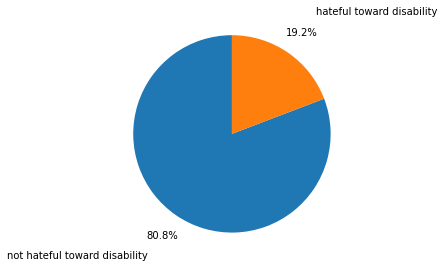

In [59]:
fig1, ax1 = plt.subplots()
ax1.pie(df['dis'].value_counts(), labels=['not hateful toward disability', 'hateful toward disability'], autopct='%1.1f%%', startangle=90, pctdistance=1.25, labeldistance=1.5)
ax1.axis('equal')

plt.show()